In [220]:
dataa = pd.read_csv("DistanceMatrix")

AxesSubplot(0.125,0.125;0.62x0.755)


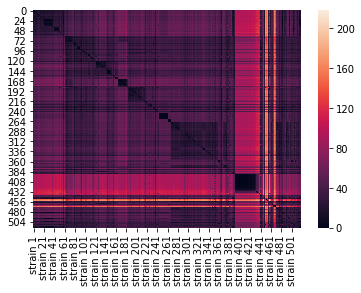

In [221]:
import seaborn as sns
print(sns.heatmap(dataa))


In [222]:
from sklearn.manifold import MDS
embedding = MDS(n_components=10,metric=True,dissimilarity='precomputed')
X_transformed = embedding.fit_transform(dataa)

In [223]:
raw_stress = embedding.stress_
normalized_stress = np.sqrt(raw_stress /((dataa.values.ravel() ** 2).sum() / 2))
print(normalized_stress.round(2))

0.12


In [224]:
MDS_df = pd.DataFrame(X_transformed,columns=['cluster ' + str(i) for i in range(1,11)])
print(MDS_df.head())

   cluster 1  cluster 2  cluster 3  cluster 4  cluster 5  cluster 6  \
0  -9.505144  20.116531 -12.063415   6.352107   7.794141  -3.543609   
1  -7.950855  17.262610 -11.900943   6.217055   7.104343  -2.412481   
2 -12.129676  20.768880 -11.742331   7.963960  14.804000   2.978824   
3  -7.716179  20.880348 -11.995631   4.470492   8.159245   0.920285   
4 -12.214802  25.078499  -6.151207   9.309336   4.010449  -6.750248   

   cluster 7  cluster 8  cluster 9  cluster 10  
0  -9.909329   7.510050  -9.052603    2.194290  
1  -9.987236   9.881786  -6.179210    4.488533  
2  -9.460882   7.232616  -6.779427    1.583294  
3 -13.336004  11.040086  -8.172619    7.780731  
4 -13.261331  12.300195  -5.798273   13.763424  


In [225]:
#merging my final dataframe with their regions and strain names
import pandas as pd
metadata_df = pd.read_csv(r'C:\Users\srava\BedfordProjects\zika\results\metadata.tsv', delimiter='\t')

In [226]:
metadata_df.head()

,strain,virus,accession,date,region,country,division,city,db,segment,authors,url,title,journal,paper_url
0,1_0015_PF,zika,KX447511,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447511,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
1,1_0016_PF,zika,KX447520,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447520,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
2,1_0030_PF,zika,KX447515,2013-11-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447515,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
3,1_0035_PF,zika,KX447514,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447514,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
4,1_0038_PF,zika,KX447517,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447517,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507


In [227]:
strains_df = pd.DataFrame(strains)
strains_df.columns = ['strain']

In [228]:
strains_df

,strain
0,DOM/2016/MA_WGS16_024
1,DOM/2016/BB_0180
2,DOM/2016/BB_0115
3,DOM/2016/BB_0208
4,DOM/2016/MA_WGS16_007
5,Yokohama/1/2016
6,Dominican_Rep_Rus_3ALT_2016
7,Dominican_Rep_Rus_4MRG_2016
8,Dominican_Rep_Rus_5RMN_2016
9,Dominican_Rep_Rus_7EGR_2016


In [229]:
result_strains = pd.merge(strains_df,metadata_df, on='strain')

In [230]:
result_strains

,strain,virus,accession,date,region,country,division,city,db,segment,authors,url,title,journal,paper_url
0,DOM/2016/MA_WGS16_024,zika,KY785435,2016-07-07,north_america,dominican_republic,dominican_republic,dominican_republic,genbank,genome,Metsky et al,https://www.ncbi.nlm.nih.gov/nuccore/KY785435,Zika virus evolution and spread in the Americas,"Nature 546 (7658), 411-415 (2017)",https://www.ncbi.nlm.nih.gov/pubmed/28538734
1,DOM/2016/BB_0180,zika,KY014304,2016-04-18,north_america,dominican_republic,dominican_republic,dominican_republic,genbank,genome,Metsky et al,https://www.ncbi.nlm.nih.gov/nuccore/KY014304,Zika virus evolution and spread in the Americas,"Nature 546 (7658), 411-415 (2017)",https://www.ncbi.nlm.nih.gov/pubmed/28538734
2,DOM/2016/BB_0115,zika,KY014321,2016-04-11,north_america,dominican_republic,dominican_republic,dominican_republic,genbank,genome,Metsky et al,https://www.ncbi.nlm.nih.gov/nuccore/KY014321,Zika virus evolution and spread in the Americas,"Nature 546 (7658), 411-415 (2017)",https://www.ncbi.nlm.nih.gov/pubmed/28538734
3,DOM/2016/BB_0208,zika,KY014300,2016-04-20,north_america,dominican_republic,dominican_republic,dominican_republic,genbank,genome,Metsky et al,https://www.ncbi.nlm.nih.gov/nuccore/KY014300,Zika virus evolution and spread in the Americas,"Nature 546 (7658), 411-415 (2017)",https://www.ncbi.nlm.nih.gov/pubmed/28538734
4,DOM/2016/MA_WGS16_007,zika,KY785453,2016-05-10,north_america,dominican_republic,dominican_republic,dominican_republic,genbank,genome,Metsky et al,https://www.ncbi.nlm.nih.gov/nuccore/KY785453,Zika virus evolution and spread in the Americas,"Nature 546 (7658), 411-415 (2017)",https://www.ncbi.nlm.nih.gov/pubmed/28538734
5,Yokohama/1/2016,zika,LC190723,2016-05-20,japan_korea,japan,japan,japan,genbank,genome,Ozawa et al,https://www.ncbi.nlm.nih.gov/nuccore/LC190723,Zika virus isolate ZIKV/Hu/Yokohama/1/2016,Unpublished,https://www.ncbi.nlm.nih.gov/pubmed/
6,Dominican_Rep_Rus_3ALT_2016,zika,MF098764,2016-05-11,north_america,dominican_republic,dominican_republic,dominican_republic,genbank,genome,Karan et al,https://www.ncbi.nlm.nih.gov/nuccore/MF098764,Imported cases of Zika virus disease in Russia...,Unpublished,https://www.ncbi.nlm.nih.gov/pubmed/
7,Dominican_Rep_Rus_4MRG_2016,zika,MF098765,2016-05-23,north_america,dominican_republic,dominican_republic,dominican_republic,genbank,genome,Karan et al,https://www.ncbi.nlm.nih.gov/nuccore/MF098765,Imported cases of Zika virus disease in Russia...,Unpublished,https://www.ncbi.nlm.nih.gov/pubmed/
8,Dominican_Rep_Rus_5RMN_2016,zika,MF098766,2016-05-31,north_america,dominican_republic,dominican_republic,dominican_republic,genbank,genome,Karan et al,https://www.ncbi.nlm.nih.gov/nuccore/MF098766,Imported cases of Zika virus disease in Russia...,Unpublished,https://www.ncbi.nlm.nih.gov/pubmed/
9,Dominican_Rep_Rus_7EGR_2016,zika,MF098768,2016-08-25,north_america,dominican_republic,dominican_republic,dominican_republic,genbank,genome,Karan et al,https://www.ncbi.nlm.nih.gov/nuccore/MF098768,Imported cases of Zika virus disease in Russia...,Unpublished,https://www.ncbi.nlm.nih.gov/pubmed/


In [231]:
finalDf = pd.concat([MDS_df, result_strains[['region','country','strain']]], axis = 1)

In [232]:
finalDf

,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,cluster 10,region,country,strain
0,-9.505144,20.116531,-12.063415,6.352107,7.794141,-3.543609,-9.909329,7.510050,-9.052603,2.194290,north_america,dominican_republic,DOM/2016/MA_WGS16_024
1,-7.950855,17.262610,-11.900943,6.217055,7.104343,-2.412481,-9.987236,9.881786,-6.179210,4.488533,north_america,dominican_republic,DOM/2016/BB_0180
2,-12.129676,20.768880,-11.742331,7.963960,14.804000,2.978824,-9.460882,7.232616,-6.779427,1.583294,north_america,dominican_republic,DOM/2016/BB_0115
3,-7.716179,20.880348,-11.995631,4.470492,8.159245,0.920285,-13.336004,11.040086,-8.172619,7.780731,north_america,dominican_republic,DOM/2016/BB_0208
4,-12.214802,25.078499,-6.151207,9.309336,4.010449,-6.750248,-13.261331,12.300195,-5.798273,13.763424,north_america,dominican_republic,DOM/2016/MA_WGS16_007
5,-7.793381,18.540354,-13.918849,5.762395,13.242467,-0.231220,-11.106311,9.397078,-7.013473,5.485571,japan_korea,japan,Yokohama/1/2016
6,-10.492499,18.997166,-7.844905,5.027690,7.442801,-0.000459,-9.171406,5.057493,-5.040509,6.339708,north_america,dominican_republic,Dominican_Rep_Rus_3ALT_2016
7,-10.999828,19.709208,-7.635665,3.395059,5.234809,-0.451873,-9.781140,8.514878,-6.525887,8.475865,north_america,dominican_republic,Dominican_Rep_Rus_4MRG_2016
8,-10.846429,19.128363,-9.898571,5.486415,7.729750,2.628851,-13.055384,5.953815,-9.545612,6.621356,north_america,dominican_republic,Dominican_Rep_Rus_5RMN_2016
9,-14.007856,26.106934,-10.621186,12.177179,11.404881,-9.430245,-10.998868,0.264860,-10.685737,5.742645,north_america,dominican_republic,Dominican_Rep_Rus_7EGR_2016


In [233]:
#There are 519 strains up until here

In [234]:
import altair as alt
from augur.utils import json_to_tree
import json
import pandas as pd

In [235]:
# Import modules
with open('Data/zika_tree.json') as fh:
    json_tree_handle = json.load(fh)
#json_tree_handle = json.loads(requests.get("http://data.nextstrain.org/zika_tree.json").text)
# Download tree JSON file used by auspice. Despite its filename extension, the data are compressed.
#http = urllib3.PoolManager()
# = http.request('GET', "")


In [236]:
tree = json_to_tree(json_tree_handle)

In [237]:
tree

Clade(branch_length=0, clade=940, name='NODE_0000520', numdate=2007.1438944876675, strain='NODE_0000520', yvalue=510.91459311393555)

In [238]:
node_data = [
    {
        "strain": node.name,
        "date": node.attr["num_date"],
        "y": node.yvalue,
        "region": node.attr["region"],
        "country": node.attr["country"],
        "parent_date": node.parent is not None and node.parent.attr["num_date"] or node.attr["num_date"],
        "parent_y": node.parent is not None and node.parent.yvalue or node.yvalue
    }
    for node in tree.find_clades(terminal=True)
]

In [239]:
node_data[10]

{'strain': 'V20366',
 'date': 2018.7748117727583,
 'y': 507,
 'region': 'south_asia',
 'country': 'india',
 'parent_date': 2018.510007605652,
 'parent_y': 507.5}

In [240]:
node_df = pd.DataFrame(node_data)

In [243]:
node_df.head()
#there are 517 strains here

,country,date,parent_date,parent_y,region,strain,y
0,thailand,2013.136893,2010.921473,516.50,southeast_asia,THA/PLCal_ZV/2013,517
1,thailand,2016.665298,2010.921473,516.50,southeast_asia,SI_BKK01,516
2,thailand,2015.043806,2010.006479,514.25,southeast_asia,SV0010/15,515
3,thailand,2016.919918,2011.367398,513.50,southeast_asia,DMSc05684_16,514
4,thailand,2013.722793,2011.367398,513.50,southeast_asia,SK403/13AS,513


In [244]:
node_df["y"] = node_df["y"].max() - node_df["y"]

In [245]:
node_df["parent_y"] = node_df["parent_y"].max() - node_df["parent_y"]

In [246]:
node_df.shape

(517, 7)

In [247]:
node_df.head()

,country,date,parent_date,parent_y,region,strain,y
0,thailand,2013.136893,2010.921473,0.00,southeast_asia,THA/PLCal_ZV/2013,0
1,thailand,2016.665298,2010.921473,0.00,southeast_asia,SI_BKK01,1
2,thailand,2015.043806,2010.006479,2.25,southeast_asia,SV0010/15,2
3,thailand,2016.919918,2011.367398,3.00,southeast_asia,DMSc05684_16,3
4,thailand,2013.722793,2011.367398,3.00,southeast_asia,SK403/13AS,4


In [248]:
node_df["region"].unique()

array(['southeast_asia', 'south_asia', 'oceania', 'china',
       'north_america', 'south_america', 'japan_korea'], dtype=object)

In [249]:
finalDf["region"].unique()

array(['north_america', 'japan_korea', 'south_america', 'oceania',
       'china', 'southeast_asia', 'south_asia'], dtype=object)

In [174]:
merged_df = pd.merge(finalDf,node_df,on=["strain","region"]).dropna()

In [250]:
merged_df
#this has 485 strains

,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,cluster 10,region,country_x,strain,country_y,date,parent_date,parent_y,y
0,0.351085,-21.318996,-7.153142,7.893785,12.908631,10.291988,-7.308258,7.557697,6.596517,-0.954861,north_america,dominican_republic,DOM/2016/MA_WGS16_024,dominican_republic,2016.517454,2016.177960,202.000000,202
1,1.508948,-18.565756,-4.487792,7.930723,13.074536,8.123541,-5.418543,10.677113,6.353492,2.258427,north_america,dominican_republic,DOM/2016/BB_0180,dominican_republic,2016.298426,2015.782991,188.000000,188
2,-0.936690,-19.730014,-6.978931,9.133809,14.526004,11.098077,-9.558240,11.129989,8.828920,-7.040300,north_america,dominican_republic,DOM/2016/BB_0115,dominican_republic,2016.279261,2015.738263,171.500000,172
3,0.316948,-22.609892,-5.155446,7.824862,15.787551,8.723285,-5.812277,11.124299,8.812550,0.030973,north_america,dominican_republic,DOM/2016/BB_0208,dominican_republic,2016.303901,2016.145963,205.000000,205
4,3.409955,-20.645804,-11.397723,11.465498,17.357534,11.816542,-5.710247,11.372193,6.776934,12.882588,north_america,dominican_republic,DOM/2016/MA_WGS16_007,dominican_republic,2016.358658,2016.145963,205.000000,206
5,0.336682,-21.124249,-9.564647,10.768622,12.419992,8.946905,-8.798085,8.450080,7.873456,0.064825,japan_korea,japan,Yokohama/1/2016,japan,2016.386037,2015.816432,198.468750,198
6,-1.591206,-16.581248,-3.654692,6.458693,14.294617,11.156716,-2.851935,7.775310,6.366268,3.979156,north_america,dominican_republic,Dominican_Rep_Rus_3ALT_2016,dominican_republic,2016.361396,2016.025840,194.375000,194
7,0.012709,-16.920440,-4.451525,8.102946,13.168841,14.289344,-1.470195,9.644066,5.514315,3.395598,north_america,dominican_republic,Dominican_Rep_Rus_4MRG_2016,dominican_republic,2016.394251,2015.828296,221.299805,220
8,0.289454,-21.324842,-8.040510,4.042978,13.835005,12.411287,-4.138611,7.923809,7.174112,2.166879,north_america,dominican_republic,Dominican_Rep_Rus_5RMN_2016,dominican_republic,2016.416153,2015.906384,200.375000,200
9,-5.008039,-27.378061,-7.415495,6.740697,23.107990,9.278048,-6.559675,3.122194,3.497132,7.982151,north_america,dominican_republic,Dominican_Rep_Rus_7EGR_2016,dominican_republic,2016.651608,2016.642525,181.000000,181


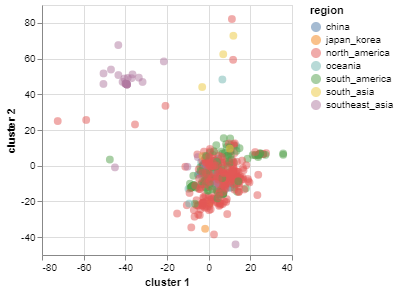

In [176]:
import altair as alt

base = alt.Chart(merged_df)
base.mark_circle(size=60).encode(
    x='cluster 1',
    y='cluster 2',
    opacity=alt.value(0.5),
    color='region',
    tooltip=['strain', 'region']
).properties(width=250,height=250).interactive()


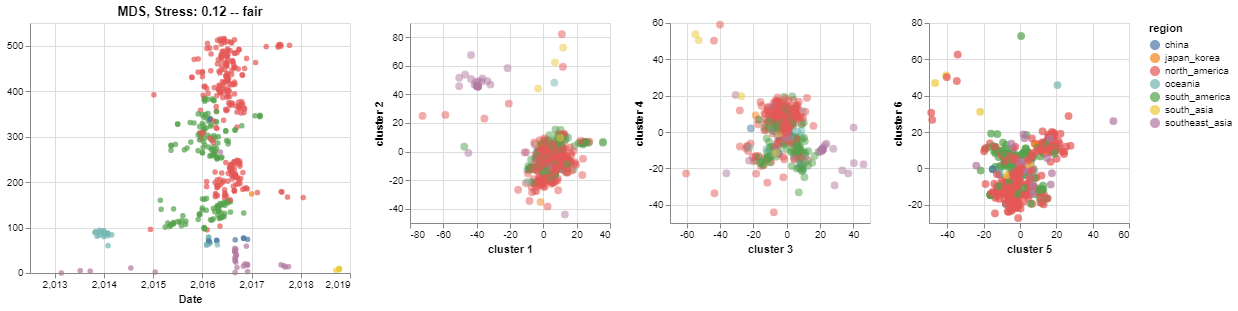

In [177]:
import altair as alt

brush = alt.selection(type='interval', resolve='global')
base = alt.Chart(merged_df)
MDS1 = base.mark_circle(size=60).encode(
    x='cluster 1',
    y='cluster 2',
    opacity=alt.value(0.5),
    color=alt.condition(brush, 'region', alt.ColorValue('gray')),
    tooltip=['strain', 'region']
).add_selection(brush).properties(width=200,height=200)

MDS2 = base.mark_circle(size=60).encode(
    x='cluster 3',
    y='cluster 4',
    opacity=alt.value(0.5),
    color=alt.condition(brush, 'region', alt.ColorValue('gray')),
    tooltip=['strain', 'region']
).add_selection(brush).properties(width=200,height=200)

MDS3 = base.mark_circle(size=60).encode(
    x='cluster 5',
    y='cluster 6',
    color=alt.condition(brush, 'region', alt.ColorValue('gray')),
    tooltip=['strain', 'region']
).add_selection(
    brush
).properties(
    width=200,
    height=200
)
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)
tree_name = base.mark_circle().encode(
    x=alt.X(
        "date:Q",
        scale=alt.Scale(domain=(node_df["date"].min() - 0.2, node_df["date"].max() + 0.2)),
        title="Date"
    ),
    y=alt.Y(
        "y:Q",
        title=""
    ),
    color=alt.condition(brush, 'region:N', alt.ColorValue('gray')),
    #color="region:N",
    tooltip=["strain:N", "region:N", "date:Q"]
).add_selection(brush).properties(width=320,height=250,title="MDS, Stress: " + str(normalized_stress.round(2)) + " -- fair")
#make region clickable
notChart = tree_name|MDS1|MDS2|MDS3
notChart
#pc1.encode(x='principal component 1') | pc34.encode(x='principal component 3') #link the tree to this one as well
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)

In [178]:
notChart.save('../Docs/MDS.html')